In [21]:
%load_ext autoreload
%autoreload 2
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [22]:
import os
import json
from PIL import Image

import numpy as np
import pandas as pd
from pycocotools.coco import COCO
import skimage.io as io
import matplotlib.pyplot as plt
%matplotlib inline
import pylab
pylab.rcParams['figure.figsize'] = (8.0, 10.0)

In [9]:
json_file = './annotations/modanet2018_instances_train.json'
d = json.load(open(json_file))
#pd.read_json(json_file)

In [10]:
d.keys()

dict_keys(['info', 'images', 'year', 'licenses', 'type', 'annotations', 'categories'])

In [11]:
len(d['images'])

52377

In [12]:
df = pd.DataFrame(d['images']).set_index('id').sort_index()
df

,file_name,height,license,width
id,,,,
3,0000003.jpg,600,3,400
13,0000013.jpg,600,3,400
148,0000148.jpg,600,3,400
156,0000156.jpg,600,3,400
174,0000174.jpg,600,3,400
211,0000211.jpg,600,3,400
224,0000224.jpg,600,3,400
270,0000270.jpg,600,3,400
271,0000271.jpg,600,3,400


In [13]:
d['annotations'][0]

{'segmentation': [[161,
   248,
   170,
   248,
   173,
   249,
   189,
   251,
   199,
   252,
   199,
   250,
   212,
   250,
   212,
   252,
   224,
   253,
   239,
   251,
   248,
   250,
   257,
   247,
   257,
   253,
   249,
   255,
   248,
   260,
   248,
   265,
   228,
   264,
   215,
   264,
   200,
   264,
   196,
   261,
   189,
   260,
   182,
   259,
   171,
   259,
   164,
   255,
   160,
   254,
   161,
   254]],
 'area': 1746,
 'iscrowd': 0,
 'image_id': 736791,
 'bbox': [160, 247, 97, 18],
 'category_id': 2,
 'id': 0}

In [15]:
df_ann = pd.DataFrame(d['annotations']).set_index(['image_id', 'id'])
df_ann

area                  bbox  category_id  iscrowd  \
image_id id                                                          
736791   0        1746    [160, 247, 97, 18]            2        0   
         1        1092    [287, 537, 26, 42]            4        0   
         2       37352  [132, 255, 161, 232]           11        0   
         3       14605  [145, 126, 115, 127]            9        0   
997730   4        1232     [142, 52, 56, 22]            7        0   
         5        9108    [113, 151, 92, 99]            9        0   
         6       12768  [117, 212, 114, 112]           11        0   
         7        1875    [165, 483, 25, 75]            4        0   
763229   8       28951  [122, 168, 131, 221]            9        0   
         9        9690   [195, 332, 57, 170]            8        0   
         10       3280    [216, 503, 41, 80]            4        0   
764244   11       6014     [140, 88, 97, 62]            9        0   
         12       1820      [157, 0, 20, 91]           13        0   
         13       9916     [139, 0, 67, 148]            5        0   
         14       5390    [128, 379, 55, 98]            4        0   
1019370  15      21390  [125, 276, 138, 155]            1        0   
         16        480    [301, 505, 24, 20]            4        0   
         17       1100    [179, 323, 50, 22]            6        0   
1019763  18       7800   [230, 165, 50, 156]            5        0   
         19       1815     [32, 515, 55, 33]            4        0   
         20        396     [277, 266, 9, 44]           13        0   
1019820  21        624    [229, 120, 13, 48]            1        0   
         22        882    [137, 238, 18, 49]            6        0   
         23       2822    [154, 479, 34, 83]            3        0   
1019822  24        825    [185, 542, 33, 25]            4        0   
         25      16275   [158, 339, 93, 175]            8        0   
         26       2006    [119, 291, 34, 59]            1        0   
         27       3600     [154, 73, 72, 50]           12        0   
         28       1656    [212, 308, 46, 36]            9        0   
         29      23460  [136, 162, 138, 170]            5        0   
...                ...                   ...          ...      ...   
602264   221247   3486    [181, 105, 42, 83]            5        0   
602400   221248   6975     [165, 69, 93, 75]           13        0   
         221249  35397   [117, 96, 171, 207]            5        0   
         221250  31784  [129, 284, 137, 232]            8        0   
         221251   1632    [232, 508, 48, 34]            4        0   
602422   221252   1952    [153, 229, 61, 32]            2        0   
         221253   5040    [133, 514, 80, 63]            4        0   
         221254  10492   [121, 233, 122, 86]            5        0   
602466   221255   3840    [260, 512, 60, 64]            4        0   
         221256   7920   [225, 146, 60, 132]            5        0   
         221257  14630  [189, 257, 110, 133]            6        0   
602493   221258   2002    [158, 252, 26, 77]            1        0   
         221259   5504    [198, 128, 64, 86]            9        0   
         221260  18762  [175, 206, 118, 159]           11        0   
         221261  22172   [185, 342, 92, 241]            8        0   
         221262   1140    [253, 535, 30, 38]            4        0   
         221263  10750   [257, 100, 50, 215]            5        0   
602519   221264  52866   [174, 71, 178, 297]            5        0   
         221265  26966   [15, 401, 139, 194]            1        0   
         221266    396    [276, 556, 18, 22]            4        0   
         221267  31104  [222, 348, 128, 243]            8        0   
602631   221268    924     [237, 51, 44, 21]            7        0   
         221269  25545  [174, 100, 131, 195]            9        0   
         221270  26660  [174, 270, 124, 215]            8        0   
         221271   4982   [20

In [4]:
json_file = './annotations/modanet2018_instances_train.json'
coco=COCO(json_file)

loading annotations into memory...
Done (t=2.62s)
creating index...
index created!


In [7]:
cats = coco.loadCats(coco.getCatIds())
all_ctgs = [cat['name'] for cat in cats]
all_ctgs

all_ctg_ids = coco.getCatIds(catNms=all_ctgs)
all_ctg_ids

['bag',
 'belt',
 'boots',
 'footwear',
 'coat/jacket/suit/blazers/cardigan/sweater/Jumpsuits/Rompers/vest',
 'dress/t-shir dress',
 'sunglasses',
 'pants/jeans/leggings',
 'top/blouse/t-shirt/shirt',
 'shorts',
 'skirt',
 'headwear',
 'scarf/tie']

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]

In [8]:
json_file = '../PaperDoll/labels/paperdoll.json'
df_ppdl = pd.read_json(json_file)
df_ppdl

,items,post_url,snap_id,snap_url
0,"[{'category_id': 22, 'category': 'jacket'}, {'...",http://www.chictopia.com/photo/show/16781,10,http://images1.chictopia.com/photos/homme/5747...
1,"[{'category_id': 22, 'category': 'jacket'}, {'...",http://www.chictopia.com/photo/show/9833,15,http://images2.chictopia.com/photos/homme/4228...
2,"[{'category_id': 35, 'category': 'shirt'}]",http://www.chictopia.com/photo/show/7413,18,http://images3.chictopia.com/photos/homme/4923...
3,"[{'category_id': 4, 'category': 'blazer'}, {'c...",http://www.chictopia.com/photo/show/1382,27,http://images0.chictopia.com/photos/homme/3485...
4,"[{'category_id': 36, 'category': 'shoes'}, {'c...",http://www.chictopia.com/photo/show/2841,32,http://images1.chictopia.com/photos/thefashbot...
5,"[{'category_id': 22, 'category': 'jacket'}, {'...",http://www.chictopia.com/photo/show/858,35,http://images2.chictopia.com/photos/homme/1025...
6,"[{'category_id': 32, 'category': 'romper'}, {'...",http://www.chictopia.com/photo/show/3198,47,http://images3.chictopia.com/photos/thefashbot...
7,"[{'category_id': 15, 'category': 'earrings'}, ...",http://www.chictopia.com/photo/show/3197,49,http://images0.chictopia.com/photos/thefashbot...
8,"[{'category_id': 28, 'category': 'pants'}, {'c...",http://www.chictopia.com/photo/show/74064,50,http://images1.chictopia.com/photos/Luxenoir/7...
9,"[{'category_id': 3, 'category': 'belt'}, {'cat...",http://www.chictopia.com/photo/show/2972,54,http://images2.chictopia.com/photos/thefashbot...


In [16]:
ids_exist = np.intersect1d(
    df_ppdl['snap_id'].values,
    df_ann.index.levels[0],
)
ids_exist.shape

(32337,)

In [17]:
sr_post_url = df_ppdl[['snap_id', 'post_url']]\
    [df_ppdl['snap_id'].isin(ids_exist)]\
    .set_index('snap_id')['post_url']
sr_post_url
it = sr_post_url.items()

snap_id
148         http://www.chictopia.com/photo/show/10051
156          http://www.chictopia.com/photo/show/8173
174          http://www.chictopia.com/photo/show/6589
270         http://www.chictopia.com/photo/show/28321
365         http://www.chictopia.com/photo/show/12378
434        http://www.chictopia.com/photo/show/445266
471          http://www.chictopia.com/photo/show/4028
475          http://www.chictopia.com/photo/show/3331
499        http://www.chictopia.com/photo/show/220100
709         http://www.chictopia.com/photo/show/19027
731         http://www.chictopia.com/photo/show/27153
740        http://www.chictopia.com/photo/show/126217
769         http://www.chictopia.com/photo/show/21259
778           http://www.chictopia.com/photo/show/380
801           http://www.chictopia.com/photo/show/370
845           http://www.chictopia.com/photo/show/366
863         http://www.chictopia.com/photo/show/17453
864        http://www.chictopia.com/photo/show/112684
924        http://ww

(270, 'http://www.chictopia.com/photo/show/28321')

(-0.5, 399.5, 599.5, -0.5)

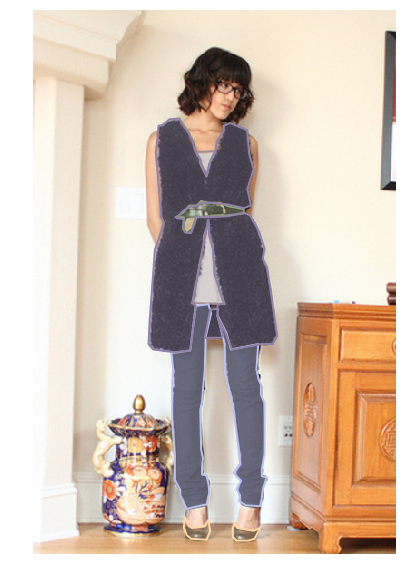

In [24]:
img_id, post_url = next(it)
img_id, post_url 

import requests
from bs4 import BeautifulSoup

def post2snap(post_url):
    res = requests.get(post_url)
    soup = BeautifulSoup(res.text)
    snap_url = soup.find('div', id="image_wrap")\
        .find('img')['src']
    return snap_url

#from IPython.display import Image

#Image(url)
#requests.get(url).text
from io import BytesIO

r = requests.get(post2snap(post_url))
I = Image.open(BytesIO(r.content))

plt.imshow(I)
plt.axis('off')

annIds = coco.getAnnIds(imgIds=img_id, catIds=all_ctg_ids, iscrowd=None)
anns = coco.loadAnns(annIds)
coco.showAnns(anns)

In [50]:
from glob import glob

img_files = glob('./images/*')
img_files = sorted(img_files)
ids_downloaded = np.array([
    int(os.path.basename(img_file).split('.')[0])
    for img_file in img_files])

itd = iter(img_files)

174

(-0.5, 399.5, 599.5, -0.5)

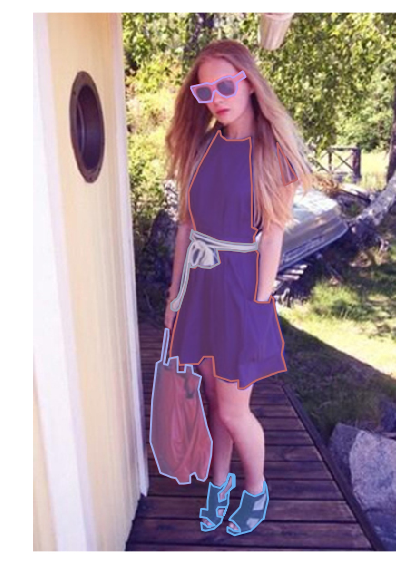

In [53]:
img_file = next(itd)
#img_file = './images/0001152.jpg'

I = io.imread(img_file)

img_id =int(os.path.basename(img_file).split('.')[0])
img_id

plt.imshow(I)

plt.axis('off')
annIds = coco.getAnnIds(imgIds=img_id, catIds=all_ctg_ids, iscrowd=None)
anns = coco.loadAnns(annIds)
coco.showAnns(anns)

(7, 'sunglasses')

(6, 'dress/t-shir dress')

(2, 'belt')

(1, 'bag')

(4, 'footwear')

(600, 400)

(-1, 6)

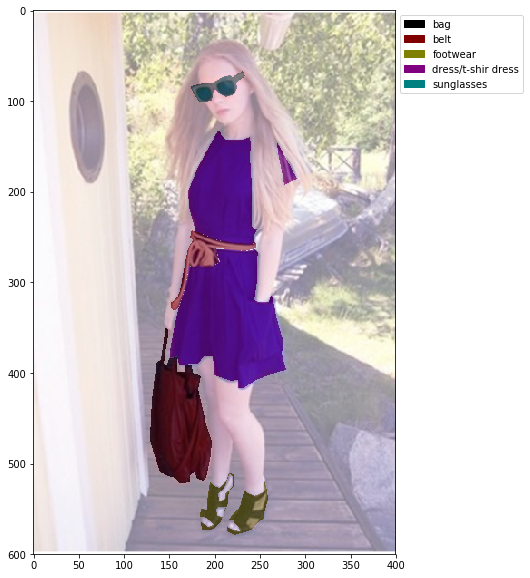

In [63]:
# for chainer
# label
img = coco.loadImgs(img_id)[0]
h, w = img['height'], img['width']

label = np.zeros((h,w)).astype(np.int32)
catids = list()
for ann in anns:
    catid = ann['category_id']
    catids.append(catid)
    cat = coco.loadCats(ids=[ann['category_id']])[0]['name']
    catid, cat
    
    label += np.int32(coco.annToMask(ann)) * ann['category_id']
    
label[~(np.isin(label, catids))] = 0
label = label - 1
label.shape
label.min(), label.max()

# image
img = np.array(Image.open(img_file).convert('RGB'))\
    .transpose(2, 0, 1)

# show
from chainercv.visualizations import vis_semantic_segmentation

ax, lenged_handles = vis_semantic_segmentation(
                        img, label,
                        label_names=all_ctgs,
                        ignore_label_color=(255,255,255),
                        alpha=0.5,
                        all_label_names_in_legend=True)
ax.legend(handles=lenged_handles,
          bbox_to_anchor=(1,1), loc=2)